In [ ]:
!nvidia-smi

Sat Mar 29 21:51:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [ ]:
import pandas as pd

df = pd.read_csv("bezdekIris.data",  # veya hangi dosya adını kullandıysan
                 sep=",",            # verilerin virgülle ayrıldığını varsayıyoruz
                 header=None,        # dosyada sütun başlıkları olmadığını varsayıyoruz
                 names=["sepal_length", "sepal_width",
                        "petal_length", "petal_width", "species"])
# Yukarıdaki 5 sütun ismi, iris örneği için geçerli
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Veri setinin boyutunu (satır ve sütun sayısını) gösterir
df.shape

(150, 5)

In [ ]:
# Veri setindeki sütun isimlerini gösterir
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Veri setinin sayısal istatistiklerini gösterir
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Veri seti hakkında genel bilgileri gösterir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Her sütundaki eksik değer sayısını gösterir
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


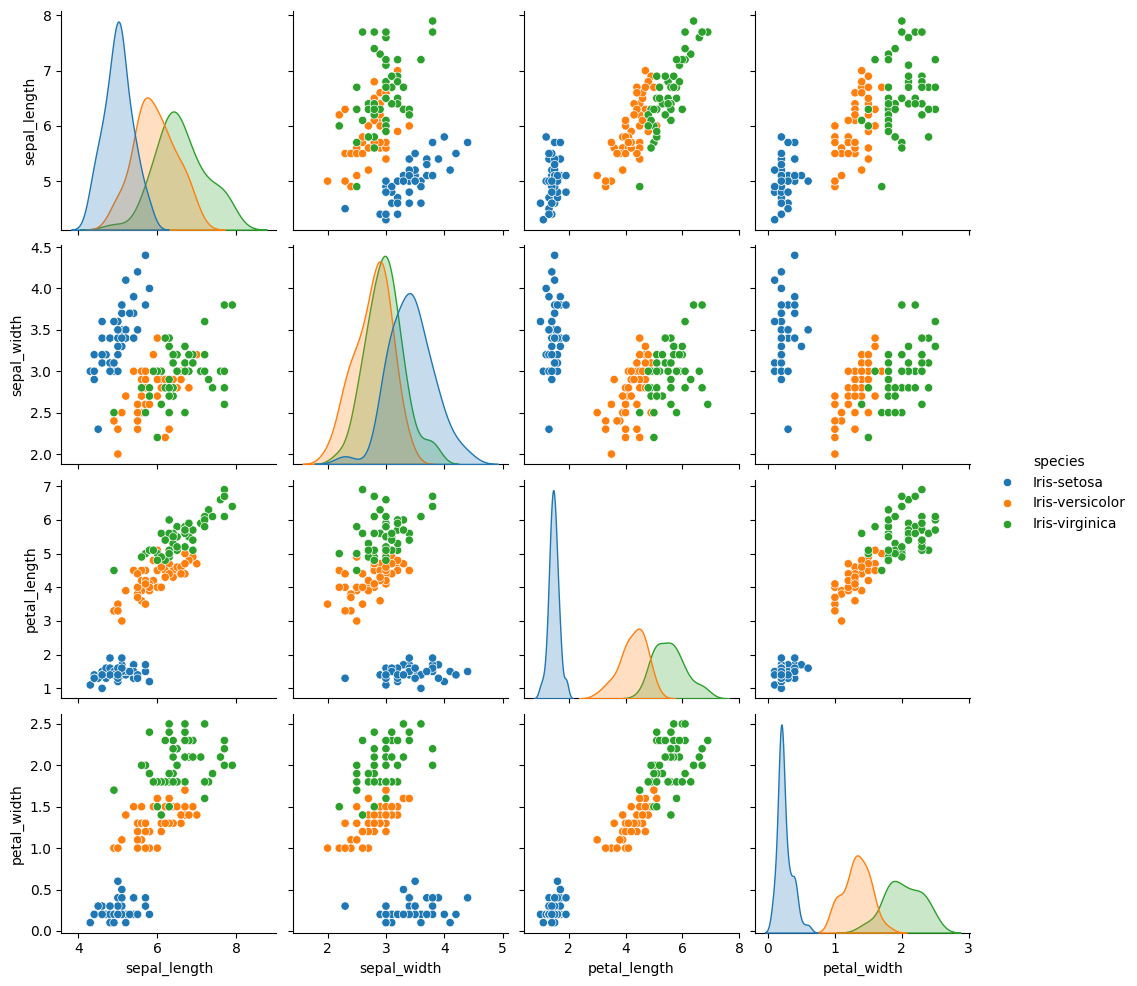

In [ ]:
# Gerekli kütüphaneleri içe aktaralım (eğer daha önce aktarmadıysanız)
import seaborn as sns
import matplotlib.pyplot as plt

# Tüm özelliklerin birbiriyle ilişkisini gösteren pairplot
sns.pairplot(df, hue="species")
plt.show()

In [ ]:
# Önce veri setimizi yüklediğimizden emin olalım
import pandas as pd
from sklearn.datasets import load_iris

# Iris veri setini yükle
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Şimdi train/test ayrımını yapalım
from sklearn.model_selection import train_test_split

# Giriş özellikleri (X) ve hedef değişken (y)
X = df.drop("species", axis=1)    # sepal_length, sepal_width, petal_length, petal_width
y = df["species"]                 # çiçeğin türü

# Veriyi %80 eğitim, %20 test olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ayrımın sonuçlarını görelim
print(f"Eğitim seti boyutu: {X_train.shape[0]} örnek")
print(f"Test seti boyutu: {X_test.shape[0]} örnek")

Eğitim seti boyutu: 120 örnek
Test seti boyutu: 30 örnek


In [ ]:
# Lojistik Regresyon modelini içe aktarma
from sklearn.linear_model import LogisticRegression

# Modeli oluşturma
model = LogisticRegression(max_iter=200)

# Modeli eğitim verileriyle eğitme
model.fit(X_train, y_train)

# Test verilerine dayalı tahminler yapma
y_pred = model.predict(X_test)

# Model başarısını ölçme
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 1.0


In [ ]:
# Karar Ağacı modelini içe aktarma
from sklearn.tree import DecisionTreeClassifier

# Karar Ağacı modelini oluşturma
model = DecisionTreeClassifier(random_state=42)

# Modeli eğitim verileriyle eğitme
model.fit(X_train, y_train)

# Test verilerine dayalı tahminler yapma
y_pred = model.predict(X_test)

# Model başarısını ölçme
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 1.0


In [ ]:
# Random Forest modelini içe aktarma
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturma
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verileriyle eğitme
model.fit(X_train, y_train)

# Test verilerine dayalı tahminler yapma
y_pred = model.predict(X_test)

# Model başarısını ölçme
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 1.0


In [ ]:
# SVM modelini içe aktarma
from sklearn.svm import SVC

# SVM modelini oluşturma
model = SVC(kernel='rbf', random_state=42)

# Modeli eğitim verileriyle eğitme
model.fit(X_train, y_train)

# Test verilerine dayalı tahminler yapma
y_pred = model.predict(X_test)

# Model başarısını ölçme
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Test edilecek modeller
models = {
    'Lojistik Regresyon': LogisticRegression(max_iter=200),
    'Karar Ağacı': DecisionTreeClassifier(random_state=42),
    'Rastgele Orman': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
}

# Sonuçları saklayacağımız sözlük
results = {}

# Her modeli eğit ve test et
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Sonuçları tablo olarak görüntüle
import pandas as pd
results_df = pd.DataFrame({'Model': list(results.keys()), 'Accuracy': list(results.values())})
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print("\nModel Karşılaştırma:")
print(results_df)



Lojistik Regresyon Accuracy: 1.0000
Karar Ağacı Accuracy: 1.0000
Rastgele Orman Accuracy: 1.0000
SVM Accuracy: 1.0000

Model Karşılaştırma:
                Model  Accuracy
0  Lojistik Regresyon       1.0
1         Karar Ağacı       1.0
2      Rastgele Orman       1.0
3                 SVM       1.0


In [ ]:
# Gerekli kütüphaneleri import edelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

# Breast Cancer veri setini yükleyelim
cancer = load_breast_cancer()

# Veri seti hakkında temel bilgileri görelim
print("Veri seti boyutu:", cancer.data.shape)
print("Özellik sayısı:", len(cancer.feature_names))
print("Hedef sınıflar:", cancer.target_names)
print("Sınıf dağılımı:", np.bincount(cancer.target))

Veri seti boyutu: (569, 30)
Özellik sayısı: 30
Hedef sınıflar: ['malignant' 'benign']
Sınıf dağılımı: [212 357]


In [ ]:
# Veri setini DataFrame'e dönüştürelim
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Veri setinin boyutunu kontrol edelim
print("Veri seti boyutu:", df.shape)

# İlk birkaç satırı görelim
print("\nVeri setinin ilk 5 satırı:")
print(df.head())

Veri seti boyutu: (569, 31)

Veri setinin ilk 5 satırı:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wors

In [ ]:
# Temel istatistiklere bakalım
print("Temel İstatistikler:")
print(df.describe())

# Eksik değer kontrolü yapalım
print("\nEksik değer sayısı:", df.isnull().sum().sum())
print("\nSütunlara göre eksik değerler:")
print(df.isnull().sum())

# Sınıf dağılımını kontrol edelim
print("\nSınıf dağılımı:")
print(df['target'].value_counts())
print("Yüzdelik dağılım:")
print(df['target'].value_counts(normalize=True) * 100)



Temel İstatistikler:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

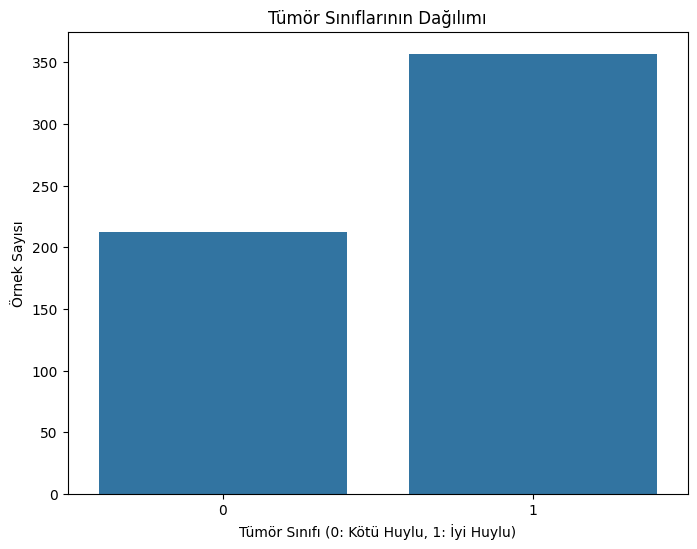

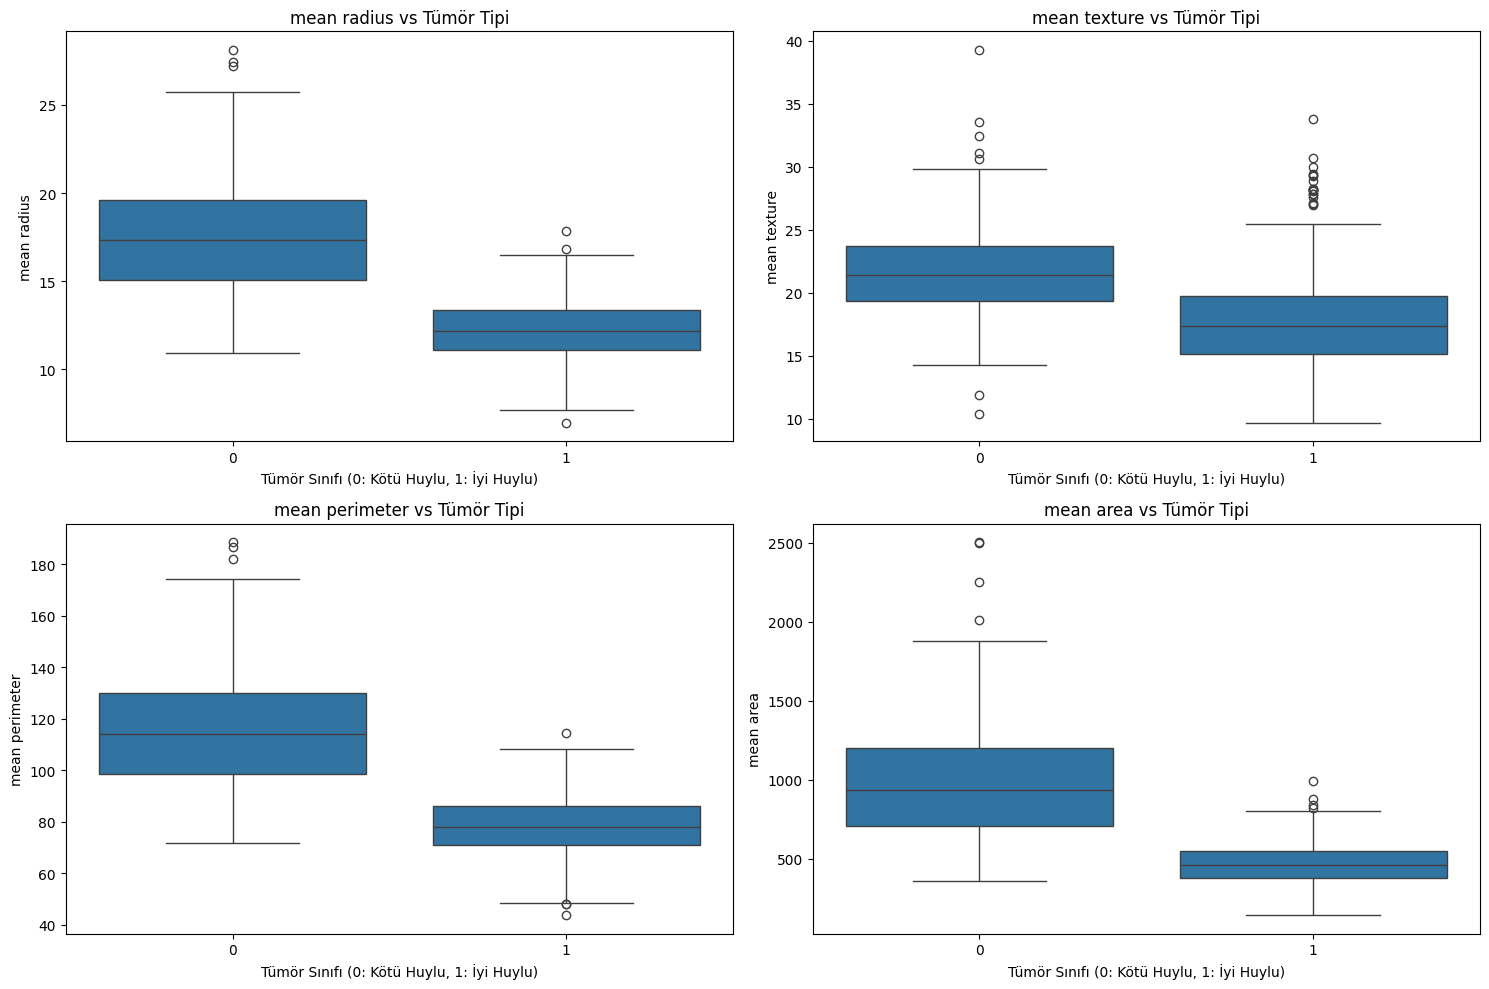

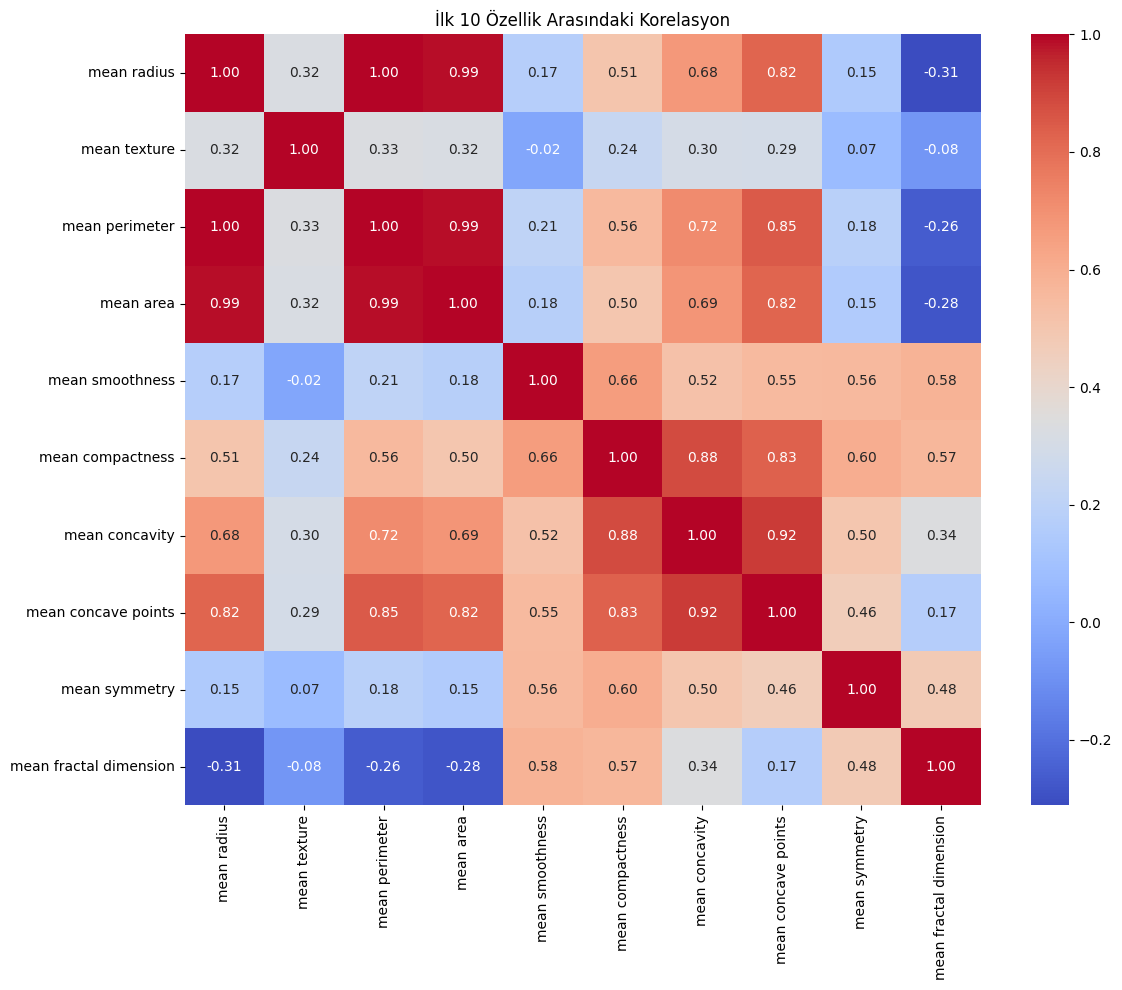

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Tümör Sınıflarının Dağılımı')
plt.xlabel('Tümör Sınıfı (0: Kötü Huylu, 1: İyi Huylu)')
plt.ylabel('Örnek Sayısı')
plt.show()

# Özelliklerden birkaçını kutu grafiği ile inceleyelim
plt.figure(figsize=(15, 10))
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Tümör Tipi')
    plt.xlabel('Tümör Sınıfı (0: Kötü Huylu, 1: İyi Huylu)')
plt.tight_layout()
plt.show()

# Özellikler arası korelasyonu inceleyelim
plt.figure(figsize=(12, 10))
# İlk 10 özellik için korelasyon
correlation = df.iloc[:, :10].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('İlk 10 Özellik Arasındaki Korelasyon')
plt.tight_layout()
plt.show()

In [ ]:
# Özellikler ve hedef değişkeni ayıralım
X = df.drop('target', axis=1)
y = df['target']

# Veriyi eğitim ve test setlerine ayıralım
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)
print("Eğitim seti sınıf dağılımı:", np.bincount(y_train))
print("Test seti sınıf dağılımı:", np.bincount(y_test))

Eğitim seti boyutu: (455, 30)
Test seti boyutu: (114, 30)
Eğitim seti sınıf dağılımı: [169 286]
Test seti sınıf dağılımı: [43 71]


In [ ]:
# Lojistik Regresyon modelini import edin ve oluşturun
from sklearn.linear_model import LogisticRegression

# Modeli oluşturun
lr_model = LogisticRegression(max_iter=200)

# Modeli eğitim verileriyle eğitin
lr_model.fit(X_train, y_train)

# Test verileriyle tahmin yapın
lr_pred = lr_model.predict(X_test)

# Performans metriklerini hesaplayın
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print("Lojistik Regresyon Sonuçları:")
print(f"Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(lr_report)
print("Confusion Matrix:")
print(lr_cm)

Lojistik Regresyon Sonuçları:
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[39  4]
 [ 1 70]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Karar Ağacı modelini import edin ve oluşturun
from sklearn.tree import DecisionTreeClassifier

# Modeli oluşturun
dt_model = DecisionTreeClassifier(random_state=42)

# Modeli eğitim verileriyle eğitin
dt_model.fit(X_train, y_train)

# Test verileriyle tahmin yapın
dt_pred = dt_model.predict(X_test)

# Performans metriklerini hesaplayın
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print("\nKarar Ağacı Sonuçları:")
print(f"Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_cm)


Karar Ağacı Sonuçları:
Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  3]
 [ 3 68]]


In [ ]:
# Random Forest modelini import edin ve oluşturun
from sklearn.ensemble import RandomForestClassifier

# Modeli oluşturun
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verileriyle eğitin
rf_model.fit(X_train, y_train)

# Test verileriyle tahmin yapın
rf_pred = rf_model.predict(X_test)

# Performans metriklerini hesaplayın
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest Sonuçları:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(rf_report)
print("Confusion Matrix:")
print(rf_cm)


Random Forest Sonuçları:
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[40  3]
 [ 1 70]]


Lojistik Regresyon Accuracy: 0.9561
Karar Ağacı Accuracy: 0.9474
Random Forest Accuracy: 0.9649


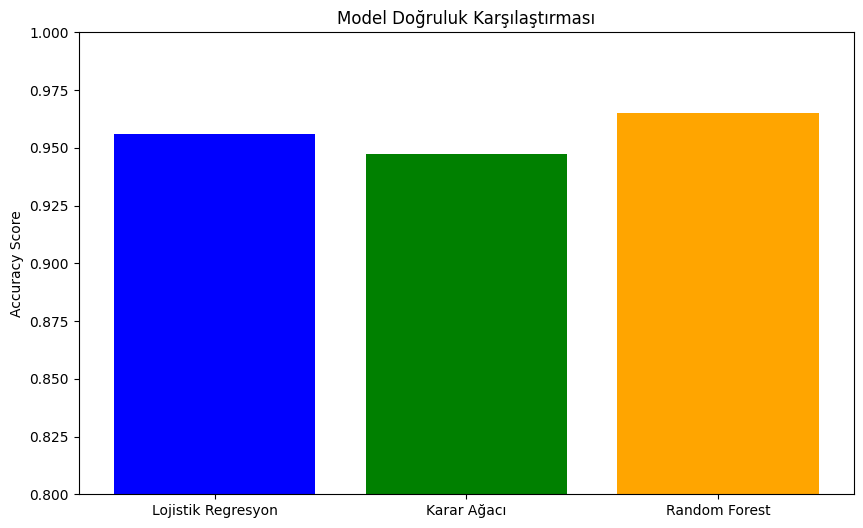

In [ ]:
# Accuracy değerlerini bir sözlükte toplayalım
accuracy_scores = {
    'Lojistik Regresyon': lr_accuracy,
    'Karar Ağacı': dt_accuracy,
    'Random Forest': rf_accuracy
}

# Accuracy değerlerini yazdıralım
for model, accuracy in accuracy_scores.items():
    print(f"{model} Accuracy: {accuracy:.4f}")

# Görselleştirelim
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange'])
plt.title('Model Doğruluk Karşılaştırması')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1)  # Daha iyi görselleştirme için
plt.show()




Kötü Huylu Tümörleri Tespit Etme Yeteneği (Recall):
Lojistik Regresyon Recall: 0.9070
Karar Ağacı Recall: 0.9302
Random Forest Recall: 0.9302


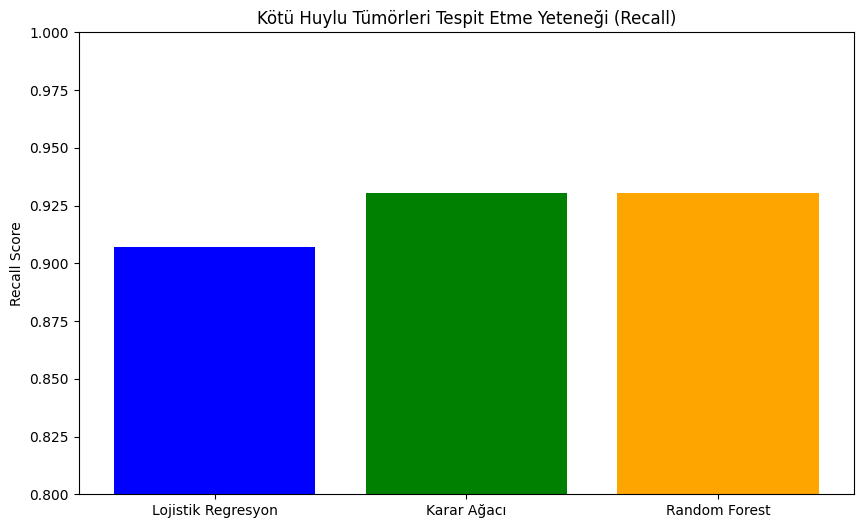

In [ ]:
# Her model için recall değerlerini hesaplayalım
from sklearn.metrics import recall_score

recall_scores = {
    'Lojistik Regresyon': recall_score(y_test, lr_pred, pos_label=0),  # Kötü huylu tümörler için (0)
    'Karar Ağacı': recall_score(y_test, dt_pred, pos_label=0),
    'Random Forest': recall_score(y_test, rf_pred, pos_label=0)
}

# Recall değerlerini yazdıralım
print("\nKötü Huylu Tümörleri Tespit Etme Yeteneği (Recall):")
for model, recall in recall_scores.items():
    print(f"{model} Recall: {recall:.4f}")

# Görselleştirelim
plt.figure(figsize=(10, 6))
plt.bar(recall_scores.keys(), recall_scores.values(), color=['blue', 'green', 'orange'])
plt.title('Kötü Huylu Tümörleri Tespit Etme Yeteneği (Recall)')
plt.ylabel('Recall Score')
plt.ylim(0.8, 1)
plt.show()

In [ ]:
# Her model için precision değerlerini hesaplayalım
from sklearn.metrics import precision_score

precision_scores = {
    'Lojistik Regresyon': precision_score(y_test, lr_pred, pos_label=0),  # Kötü huylu tümörler için (0)
    'Karar Ağacı': precision_score(y_test, dt_pred, pos_label=0),
    'Random Forest': precision_score(y_test, rf_pred, pos_label=0)
}

# Precision değerlerini yazdıralım
print("\nTahminlerin Güvenilirliği (Precision):")
for model, precision in precision_scores.items():
    print(f"{model} Precision: {precision:.4f}")


Tahminlerin Güvenilirliği (Precision):
Lojistik Regresyon Precision: 0.9750
Karar Ağacı Precision: 0.9302
Random Forest Precision: 0.9756


In [ ]:
# Tüm metrikleri bir tabloda toplayalım
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': list(accuracy_scores.keys()),
    'Accuracy': list(accuracy_scores.values()),
    'Recall (Kötü Huylu)': list(recall_scores.values()),
    'Precision (Kötü Huylu)': list(precision_scores.values())
})

# F1 skorunu da ekleyelim
from sklearn.metrics import f1_score

f1_scores = {
    'Lojistik Regresyon': f1_score(y_test, lr_pred, pos_label=0),
    'Karar Ağacı': f1_score(y_test, dt_pred, pos_label=0),
    'Random Forest': f1_score(y_test, rf_pred, pos_label=0)
}

comparison_df['F1-Score (Kötü Huylu)'] = list(f1_scores.values())

# Tabloyu gösterelim
print("\nModel Karşılaştırma Tablosu:")
print(comparison_df)


Model Karşılaştırma Tablosu:
                Model  Accuracy  Recall (Kötü Huylu)  Precision (Kötü Huylu)  \
0  Lojistik Regresyon  0.956140             0.906977                0.975000   
1         Karar Ağacı  0.947368             0.930233                0.930233   
2       Random Forest  0.964912             0.930233                0.975610   

   F1-Score (Kötü Huylu)  
0               0.939759  
1               0.930233  
2               0.952381  
